### Naive bayes

In [2]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [11]:
from utils import *
import numpy as np

In [12]:
X_train = load_tweets('../data/ft_train.txt')
X_val = load_tweets('../data/ft_val.txt')

In [54]:
human_train = load_tweets('../data/human_train.txt')
human_val = load_tweets('../data/human_val.txt')

In [47]:
y_train = np.load('../out/labels_train.npy')
y_val = np.load('../out/labels_val.npy')

In [48]:
y_train = [str(l) for l in y_train]
y_val = [str(l) for l in y_val]

In [14]:
X_train = [' '.join(t.split()[1:]) for t in X_train]
X_val = [' '.join(t.split()[1:]) for t in X_val]

In [55]:
human_train = [' '.join(t.split()[1:]) for t in human_train]
human_val = [' '.join(t.split()[1:]) for t in human_val]

In [18]:
def extract_features(word_list):
    return dict([(word, True) for word in word_list])

In [19]:
train_features = [extract_features(t.split()) for t in X_train]
val_features = [extract_features(t.split()) for t in X_val]

In [57]:
human_train = [extract_features(t.split()) for t in human_train]
human_val = [extract_features(t.split()) for t in human_val]

In [49]:
X_y_train = list(zip(train_features, y_train))
X_y_val = list(zip(val_features, y_val))

In [58]:
human_train = list(zip(human_train, y_train))
human_val = list(zip(human_val, y_val))

In [22]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

In [51]:
nb = NaiveBayesClassifier.train(X_y_train)

In [52]:
print("Accuracy: ", nltk.classify.util.accuracy(nb, X_y_val))

Accuracy:  0.7588951259312438


In [53]:
nb.show_most_informative_features()

Most Informative Features
               paperback = True               -1 : 1      =  11284.8 : 1.0
               hardcover = True               -1 : 1      =   2413.2 : 1.0
                   atech = True               -1 : 1      =   1452.5 : 1.0
                     1gb = True               -1 : 1      =   1070.4 : 1.0
                   width = True               -1 : 1      =    726.9 : 1.0
                  compaq = True               -1 : 1      =    630.8 : 1.0
               casecrown = True               -1 : 1      =    620.3 : 1.0
                   cdrom = True               -1 : 1      =    617.0 : 1.0
                     ddr = True               -1 : 1      =    589.0 : 1.0
                diameter = True               -1 : 1      =    530.1 : 1.0


In [59]:
nb2 = NaiveBayesClassifier.train(human_train)

In [60]:
print("Accuracy: ", nltk.classify.util.accuracy(nb2, human_val))

Accuracy:  0.771824081638945


In [61]:
nb2.show_most_informative_features()

Most Informative Features
               paperback = True               -1 : 1      =  11272.9 : 1.0
               hardcover = True               -1 : 1      =   2412.8 : 1.0
                    1.25 = True               -1 : 1      =   1497.5 : 1.0
                  a-tech = True               -1 : 1      =   1452.1 : 1.0
                     1gb = True               -1 : 1      =   1070.4 : 1.0
            manufactured = True               -1 : 1      =    883.2 : 1.0
               webster's = True               -1 : 1      =    875.0 : 1.0
                   width = True               -1 : 1      =    726.2 : 1.0
             manufacture = True               -1 : 1      =    694.0 : 1.0
                  compaq = True               -1 : 1      =    630.8 : 1.0


In [ ]:
nb.

* * *

In [56]:
import matplotlib.pyplot as plt

In [57]:
neg = load_tweets('../data/train_neg_full.txt')

In [92]:
from collections import Counter
neg_c = Counter()
for t in neg:
    for w in t.split():
        neg_c[w] += 1

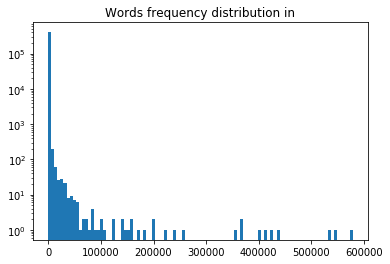

In [86]:
plt.yscale('log')
plt.title('Words frequency distribution in')
plt.hist(neg_c.values(), bins=100)
plt.show()

In [87]:
pos = load_tweets('../data/train_pos_full.txt')

In [93]:
pos_c = Counter()
for t in pos:
    for w in t.split():
        pos_c[w] += 1

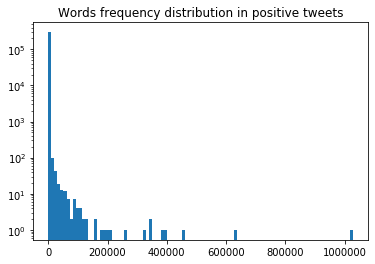

In [90]:
plt.yscale('log')
plt.title('Words frequency distribution in positive tweets')
plt.hist(pos_c.values(), bins=100)
plt.show()

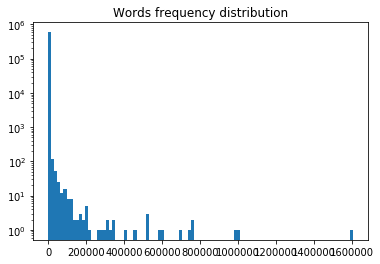

In [97]:
all_words = pos_c.copy()
all_words.update(neg_c)
plt.yscale('log')
plt.title('Words frequency distribution')
plt.hist(all_words.values(), bins=100)
plt.show()

In [98]:
clean_data = load_tweets('../data/clean/train_full_no_label.txt')

In [99]:
clean_c = Counter()
for t in clean_data:
    for w in t.split():
        clean_c[w] += 1

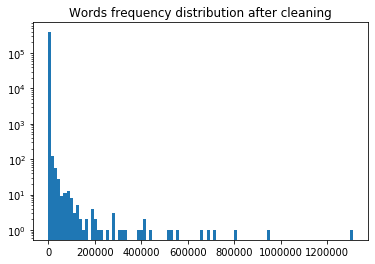

In [102]:
plt.yscale('log')
plt.title('Words frequency distribution after cleaning')
plt.hist(clean_c.values(), bins=100)
plt.show()

In [104]:
print('unique words before:', len(all_words),'unique words after:',len(clean_c))

unique words before: 592563 unique words after: 389866


* * *

In [13]:
import sent2vec
from utils import *

In [2]:
s2v = sent2vec.Sent2vecModel()

In [37]:
s2v.load_model('../models/sent2vec.bin')

In [14]:
train = load_tweets('../data/ft_train.txt')
val = load_tweets('../data/ft_val.txt')

In [15]:
train_no_label = [' '.join(t.split()[1:]) for t in train]
val_no_label = [' '.join(t.split()[1:]) for t in val]

In [38]:
train_embed = s2v.embed_sentences(train_no_label)

In [39]:
val_embed = s2v.embed_sentences(val_no_label)

In [76]:
train_embed = np.array([model.get_sentence_vector(t) for t in train])
val_embed = np.array([model.get_sentence_vector(t) for t in val])

In [89]:
import numpy as np
y_train = one_minus_one_labels_to_one_zero(np.load('../out/labels_train.npy'))
y_val = one_minus_one_labels_to_one_zero(np.load('../out/labels_val.npy'))

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model_lr = LogisticRegression(C=0.6, solver='saga', multi_class='ovr', verbose=1, random_state=0, n_jobs=-1)

In [92]:
model_lr.fit(train_embed, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 15 epochs took 99 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [93]:
model_lr.score(val_embed, y_val)

0.9161720953893111

In [95]:
test_embed = np.array([model.get_sentence_vector(t) for t in test_data])

In [100]:
preds = one_zero_labels_to_one_minus_one(model_lr.predict(test_embed))

In [101]:
generate_submission('../out/sub_inch.csv', preds)

In [106]:
model.save_model('../models/best_model_fasttext')

### LR from embedded sentences (GloVe)

In [1]:
from utils import *

In [2]:
x_train, y_train = load_embeddings('../out/glove_train.npy', '../out/labels_train.npy')

In [12]:
x_val, y_val = load_embeddings('../out/glove_val.npy', '../out/labels_val.npy')

In [13]:
y_val = one_minus_one_labels_to_one_zero(y_val)

In [7]:
y_train = one_minus_one_labels_to_one_zero(y_train)

In [4]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(solver='saga', multi_class='ovr', verbose=1, random_state=0, n_jobs=-1)

In [17]:
model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 44 epochs took 104 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [20]:
model.score(x_val, y_val)

0.7425439939043861

### LR from embedded sentences (fasttext)

In [148]:
x_train, y_train = load_embeddings('../out/skipgram_train.npy', '../out/labels_train.npy')

In [149]:
x_val, y_val = load_embeddings('../out/skipgram_val.npy', '../out/labels_val.npy')

In [150]:
y_val = one_minus_one_labels_to_one_zero(y_val)

In [151]:
y_train = one_minus_one_labels_to_one_zero(y_train)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
lr_model = LogisticRegression(solver='saga', multi_class='ovr', verbose=1, random_state=0, n_jobs=-1)

In [154]:
lr_model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 22 epochs took 82 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [156]:
lr_model.score(x_val, y_val)

0.7287363713039284

### Getting sentence embeddings from GloVe model

In [22]:
from utils import *
from glove import Glove

In [23]:
glove = Glove.load('../models/glove.model')

In [40]:
tweets = load_tweets('../data/ft_val.txt')

In [25]:
import numpy as np

In [26]:
# add 0 for padding / unknown
word_vectors = np.concatenate((np.zeros((1,glove.word_vectors.shape[1])),glove.word_vectors), axis=0)
vocab = {w:glove.dictionary[w]+1 for w in glove.dictionary}
assert np.all(word_vectors[vocab['lol']] == glove.word_vectors[glove.dictionary['lol']])

In [48]:
DIM = word_vectors.shape[1]
def embed_tweet(tweet):
    embedding = np.zeros((DIM,))
    words = tweet.split()
    c = 0
    for w in words:
        if w in vocab: c += 1
        embedding += word_vectors[vocab.get(w, 0)] # add word vector or only 0s if unknown
    return embedding / c if c > 0 else embedding # return average of (known) words

In [49]:
embedded = np.array([embed_tweet(t) for t in tweets])

KeyboardInterrupt: 

In [35]:
np.save('../out/glove_val', embedded)

In [15]:
labels = np.array([1 if '__label__1' in t else -1 for t in tweets])

In [16]:
np.save('../out/labels_val', labels)

* * *

In [1]:
from utils import *

In [67]:
X,y = load_tweets('../data/clean/train_full.txt', True)

In [68]:
labels = ['__label__1' if l == 1 else '__label__-1' for l in y]

In [69]:
with open('../data/clean_train_full_fasttext.txt', 'w') as f:
    for l,x in zip(labels, X):
        f.write(l + ' ' + x + '\n')

* * *

In [2]:
all_tweets = load_tweets('../data/clean/train_full_fasttext.txt')

In [27]:
X_train, X_val = split_data(all_tweets, 0.8, seed=0)

In [28]:
TRAIN_PATH = '../data/ft_train.txt'
save_tweets(TRAIN_PATH, X_train)
VAL_PATH = '../data/ft_val.txt'
save_tweets(VAL_PATH, X_val)

In [4]:
import fasttext
MODEL_PATH = '../models/ft_auto.bin' # CHANGE THIS PATH
TRAIN_PATH = '../data/ft_train.txt'
VAL_PATH = '../data/ft_val.txt'

In [ ]:
model = fasttext.load_model(MODEL_PATH)

In [2]:
model.test(VAL_PATH)

(454097, 0.8488494748919284, 0.8488494748919284)

In [3]:
model.test(TRAIN_PATH)

(1816385, 0.8687783702243742, 0.8687783702243742)

#### Get sentence embedding from fasttext

In [5]:
from utils import *

In [20]:
params = {
    'lr' : 0.02,
    'loss' : 'ns',
    #'epoch' : 10,
    'dim' : 200,
    'wordNgrams' : 3,
    'minCount' : 5,
    'verbose' : 2
}
model = fasttext.train_supervised(TRAIN_PATH, **params)

In [6]:
train = load_tweets(TRAIN_PATH)
val = load_tweets(VAL_PATH)

In [22]:
model.test(TRAIN_PATH)

(1816385, 0.9951177751412834, 0.9951177751412834)

In [128]:
cbow = fasttext.train_unsupervised('../data/clean/train_full_no_label.txt', model='cbow', thread=1)
cbow.save_model('../models/ft_cbow.model')
skipgram = fasttext.train_unsupervised('../data/clean/train_full_no_label.txt', model='skipgram', thread=1)
skipgram.save_model('../models/ft_skipgram.model')

In [130]:
train_no_label = [' '.join(t.split()[1:]) for t in train]
val_no_label = [' '.join(t.split()[1:]) for t in val]

In [88]:
train_embed = np.array([model.get_sentence_vector(t) for t in train])
val_embed = np.array([model.get_sentence_vector(t) for t in val])

In [138]:
np.save('../out/skipgram_train', train_embed)
np.save('../out/skipgram_val', val_embed)

In [28]:
def predict_all(model, test_data):
    labels, probas = [], []
    for x in test_data:
        l, p = model.predict(x)
        labels.append(int(l[0][9:]))
        probas.append(p[0])
    return labels, probas

In [191]:
generate_submission('../out/submission_ft_200.csv', labels)

In [223]:
params = {
    'lr' : 0.05,
    'epoch': 5,
    'loss' : 'softmax',
    'wordNgrams': 3,
    'dim' : 200,
    'minCount' : 5
}

TRAIN_PATH = '../data/ft_train.txt'
VAL_PATH = '../data/ft_val.txt'

print(params)
for i in range(2):
    X_train, X_val = split_data(all_tweets, 0.8, seed=i)
    save_tweets(TRAIN_PATH, X_train)
    save_tweets(VAL_PATH, X_val)
    model = fasttext.train_supervised(TRAIN_PATH, **params)
    print(model.test(VAL_PATH))

{'lr': 0.05, 'epoch': 5, 'loss': 'softmax', 'wordNgrams': 3, 'dim': 200, 'minCount': 5}
(454097, 0.908658282261279, 0.908658282261279)
(454097, 0.9091537711105777, 0.9091537711105777)


In [224]:
model.save_model('../models/ft_lr005')

In [5]:
import fasttext
TRAIN_PATH = '../data/ft_train.txt'
VAL_PATH = '../data/ft_val.txt'

params = {
    'lr' : 0.02,
    'epoch': 5,
    'loss' : 'ns',
    'wordNgrams': 3,
    'dim' : 200,
    'minCount' : 5,
    'verbose' : 2
}

In [24]:
test_data = load_tweets('../data/clean/test.txt')

In [7]:
all_tweets = load_tweets('../data/clean/train_full_fasttext.txt')

In [50]:
nb_iter = 15
final_probas = np.zeros((len(test_data),))
pos_count = np.zeros((len(test_data),))
neg_count = np.zeros((len(test_data),))
for i in range(nb_iter):
    print('\rTraining %d / %d' % (i+1, nb_iter), end='')
    
    # only train on part of the data for each iteration (say 80 %) ...
    X_train, X_val = split_data(all_tweets, 0.5, seed=i)
    save_tweets(TRAIN_PATH, X_train)
    #save_tweets(VAL_PATH, X_val)
    model = fasttext.train_supervised(TRAIN_PATH, **params)
    
    # ... or train on full dataset
    #model = fasttext.train_supervised('../data/clean/train_full_fasttext.txt', **params)
    
    # we can also check the accuracy on validation data (slows thigs down)
    #print('\r                  Val acc: %g' % (model.test(VAL_PATH)[1]), end='')
    
    ls, ps = predict_all(model, test_data)
    ls = np.array(ls)
    pos_count += 1 * (ls > 0)
    neg_count += 1 * (ls < 0)
    final_probas += (ls * np.array(ps))
final_probas /= nb_iter
# final_labels = [1 if x >= 0 else -1 for x in final_probas]
# generate_submission('../out/submission_ft_'+str(nb_iter)+'_iter.csv', final_labels)

Training 15 / 15

In [8]:
# reset ft_train and ft_val
X_train, X_val = split_data(all_tweets, 0.8, seed=0)
save_tweets(TRAIN_PATH, X_train)
save_tweets(VAL_PATH, X_val)

In [53]:
majority = pos_count > neg_count
majority = 2 * majority - 1
final_labels = [1 if x >= 0 else -1 for x in final_probas]

In [54]:
sum(final_labels != majority)

76

In [55]:
generate_submission('../out/submission_15_50percent.csv', final_labels)

In [11]:
np.save('../out/final_probas_7_iter', final_probas)

* * *

In [1]:
import sent2vec
import numpy
import pickle
model = sent2vec.Sent2vecModel()
model.load_model('../models/embed-model-full.bin') # The model can be sent2vec or cbow-c+w-ngrams
uni_embs, vocab = model.get_unigram_embeddings() # Return the full unigram embedding matrix

#with open('full-vocab.pkl', 'wb') as f:
#    pickle.dump(vocab, f)

#numpy.save('full-vocab-matrix', uni_embs)

In [2]:
from utils import *

In [3]:
X = load_tweets('../data/clean_train_no_label.txt')

In [4]:
len(vocab)

42566

In [5]:
uni_embs.shape

(42566, 700)

In [6]:
word2vec = dict()
for i, w in enumerate(vocab):
    word2vec[w] = uni_embs[i]

In [21]:
word2index = {w:i for i,w in enumerate(vocab)}

In [18]:
max_len = len(max(X, key=lambda x: len(x)))

In [69]:
X_nums = np.zeros((len(X),max_len), dtype='int')
for i,x in enumerate(X):
    for j,w in enumerate(x.split()):
        idx = word2index.get(w, 1)
        X_nums[i][j] = idx

In [70]:
np.save('../out/clean-train-embedded', X_nums)

In [53]:
X_train = load_tweets('../data/clean_test.txt')

In [63]:
X_train_nums = np.zeros((len(X_train),max_len), dtype='int')
for i,x in enumerate(X_train):
    for j,w in enumerate(x.split()):
        idx = word2index.get(w, 1)
        X_train_nums[i][j] = idx

In [71]:
np.save('../out/clean-test-embedded', X_train_nums)

* * *

In [56]:
from utils import *
import pickle

In [2]:
X,y = load_embeddings('../out/embeddings_train.npy', '../out/clean_train_labels.npy')

In [3]:
y = np.array(one_minus_one_labels_to_one_zero(y))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

/home/peter/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
preds = model.predict(X_test)

In [11]:
model.score(X_test, y_test)

0.8041691942866597

In [12]:
TEST = load_embeddings('../out/embeddings_test.npy')

In [13]:
preds = model.predict(TEST)

In [15]:
preds = one_zero_labels_to_one_minus_one(preds)

In [17]:
generate_submission('../out/sub_lr.csv', preds)

In [57]:
with open('../models/logistic_regression.pkl', 'wb') as f:
    pickle.dump(model, f)

* * *

In [59]:
max_depth = 10

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

In [50]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [51]:
y_pred = tree.predict(X_test)

In [52]:
tree.score(X_test, y_test)

0.6817404731704627

In [53]:
preds = tree.predict(TEST)
preds = one_zero_labels_to_one_minus_one(preds)

In [55]:
generate_submission('../out/sub_dt.csv', preds)

In [60]:
with open('../models/decision_tree_'+str(max_depth)+'.pkl', 'wb') as f:
    pickle.dump(tree, f)

* * *

In [64]:
from sklearn.svm import SVC
svm = SVC(random_state=42)

In [ ]:
svm.fit(X_train, y_train)

/home/peter/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
svm.score(X_test, y_test)

In [ ]:
preds = svm.predict(TEST)
preds = one_zero_labels_to_one_minus_one(preds)

In [ ]:
generate_submission('../out/sub_svm.csv', preds)

In [ ]:
with open('../models/svm.pkl', 'wb') as f:
    pickle.dump(svm, f)